In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_diabetes
import pandas as pd
from IPython.display import display

In [2]:
diabetes=load_diabetes(as_frame=True)
X=diabetes.data
y=diabetes.target

In [3]:
df=pd.concat([X, y.rename("target")], axis=1)
print("Diabetes dataset (first 8 rows):")
display(df.head(8))

Diabetes dataset (first 8 rows):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0


In [4]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)
model=LinearRegression()

In [5]:
mse_scores=[]
r2_scores=[]
actuals=[]
preds=[]

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), start=1):
    X_train, X_test=X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test=y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    actuals.extend(y_test.tolist())
    preds.extend(y_pred.tolist())

In [6]:
folds_df=pd.DataFrame({
    "fold":list(range(1, len(mse_scores)+1)),
    "MSE": mse_scores,
    "RMSE":np.sqrt(mse_scores),
    "R2":r2_scores
})

In [11]:
summary_df = pd.DataFrame({
    "metric": ["MSE_mean", "MSE_std", "RMSE_mean", "RMSE_std", "R2_mean", "R2_std"],
    "value": [np.mean(mse_scores), np.std(mse_scores), np.mean(np.sqrt(mse_scores)),
              np.std(np.sqrt(mse_scores)), np.mean(r2_scores), np.std(r2_scores)]
})
display(summary_df)

,metric,value
0,MSE_mean,3015.381694
1,MSE_std,291.239794
2,RMSE_mean,54.848941
3,RMSE_std,2.641094
4,R2_mean,0.478470
5,R2_std,0.084967


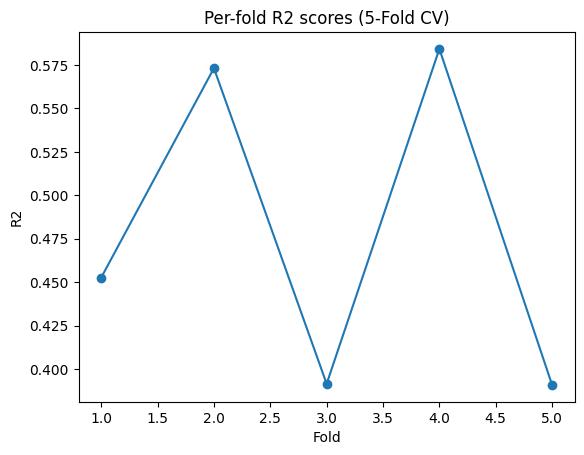

In [12]:
plt.plot(folds_df['fold'], folds_df['R2'], marker='o')
plt.xlabel("Fold")
plt.ylabel("R2")
plt.title("Per-fold R2 scores (5-Fold CV)")
plt.show()

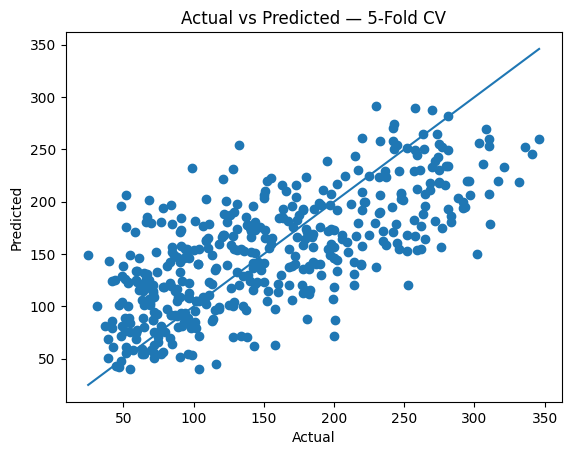

In [13]:
plt.scatter(actuals, preds)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)])  # identity
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted — 5-Fold CV")
plt.show()

In [14]:
print("MSE mean:", np.mean(mse_scores))
print("R2 mean:", np.mean(r2_scores))

MSE mean: 3015.381694287271
R2 mean: 0.47847030225778486
